## 数据属性类型练习
对于下面列出的每一个数据属性，从 {Nominal, Ordinal, Interval, Ratio} 四个选项中选出最合适的类型，并说明理由
- 国籍：Nominal 只能比较相等于与否
- 学生学号：Nominal 只能比较相等于与否
- 教育水平：Ordinal 教育水平具有顺序但基本运算无意义
- 出生日期：Interval 出生日期具有顺序且加减有意义（真实天数）
- 年收入：Ratio 有顺序且基本运算（加减乘除）有意义
- 年龄：Ratio   有顺序且基本运算（加减乘除）有意义

## 计算统计信息
### 计算这组数据的均值、中位数和众数

In [2]:
data = [9.0, 26.5, 4.8, 17.2, 31.4, 26.5, 28.0, 26.5, 34.6, 43.0, 29.8, 33.4, 27.4, 34.1, 32.9, 41.2]

# 计算平均数
mean = sum(data) / len(data)
print("平均数:", mean)

# 计算中位数
data.sort()
s = len(data)
median = (data[s // 2] + data[(s-1) // 2]) / 2
print("中位数:", median)

# 计算众数
from collections import Counter

most_common = Counter(data).most_common(1)
print("众数:", most_common[0][0])


平均数: 27.893749999999997
中位数: 28.9
众数: 26.5


### 给出五数概括，并画出盒图

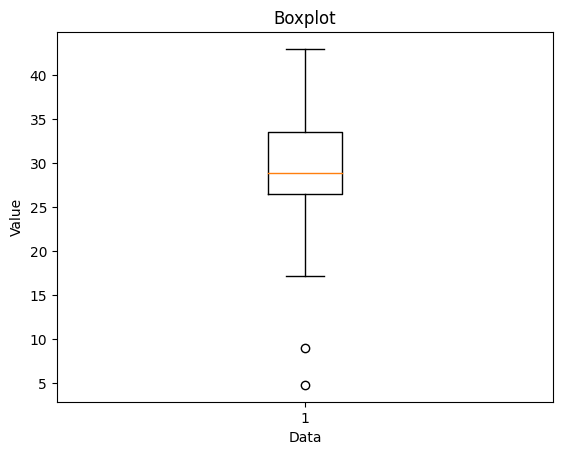

五数概括：
最小值: 4.8
Q1: 26.5
中位数: 28.9
Q3: 33.75
最大值: 43.0


In [3]:
# 给出五数概括，并画出盒图
import matplotlib.pyplot as plt

# 计算五数概括
data.sort()
interval = len(data) // 4
Q1 = (data[interval] + data[interval-1]) / 2
s = len(data)
M = (data[interval*2] + data[interval*2-1]) / 2
Q3 = (data[interval*3] + data[interval*3-1]) / 2
min_value = data[0]
max_value = data[-1]

# 画出盒图
plt.boxplot(data)
plt.title("Boxplot")
plt.xlabel("Data")
plt.ylabel("Value")
plt.show()

# 打印五数概括
print("五数概括：")
print("最小值:", min_value)
print("Q1:", Q1)
print("中位数:", M)
print("Q3:", Q3)
print("最大值:", max_value)

### 下表是与脂肪含量（%）表对应的食品热量（kcal/100g），请计算食品热量和对应的脂肪含量之间的Pearson’s coefficient。

In [4]:
#下表是与脂肪含量（%）表对应的食品热量（kcal/100g），请计算食品热量和对应的脂肪含量之间的Pearson’s coefficient
fat_data = [9.0, 26.5, 4.8, 17.2, 31.4, 26.5, 28.0, 26.5, 34.6, 43.0, 29.8, 33.4, 27.4, 34.1, 32.9, 41.2]
kol_data = [156,341,76,198,391,207,313,224,288,394,271,378,384,276,401,433]

# 计算Pearson's coefficient
n = len(fat_data)
sum_x = sum(fat_data)
mean_x = sum_x/n
sum_y = sum(kol_data)
mean_y = sum_y/n
cov_xy = sum([(fat_data[i]-mean_x)*(kol_data[i]-mean_y) for i in range(n)])
var_x = sum([(fat_data[i]-mean_x)**2 for i in range(n)])
var_y = sum([(kol_data[i]-mean_y)**2 for i in range(n)])

pearson_coefficient = cov_xy / (var_x*var_y)**0.5
print("Pearson's coefficient:", pearson_coefficient)

Pearson's coefficient: 0.8457688038832131


## 文本数据的表示：

### 根据语料内容构造词典，然后将语料中的每篇文档都表示成词典上的 tf-idf 向量

### 构造 tf-idf
首先对数据预处理，通过正则表达式完成去除掉标点符号和分词的工作。然后根据文档构建一个词表 `word_set` 存储所有词，接下来遍历每篇文档，统计词频，并计算每个词的 tf-idf 值，最后将每个文档表示成 tf-idf 向量。这里tf定义为单词在文档中出现的频率值，我参考了一些网上资料对 idf 定义为  $idf = ln(\frac{文档总数 +1}{出现该词语的文档总数+1})+1$ 加一期望得到更平滑的表示。
综上，对于文档i，其tf-idf向量定义为：
$$
\vec{v}_i = [tfidf_{i,1}, tfidf_{i,2}, \cdots, tfidf_{i,n}]
$$
其中 $tfidf_{i,j}$ 表示第 i 个文档词表中 j 号词在这篇文档中的 tf-idf 值, n 表示词表大小。

In [1]:
import os
import os.path as osp
from tqdm import tqdm
import  math
import re

def make_corpus(data_base_path = './nyt_corp0/nyt_corp0'):
    corpus = []
    document_name_list = os.listdir(data_base_path)
    for document_name in tqdm(document_name_list):
        document = []
        document_path = osp.join(data_base_path, document_name)
        with open(document_path) as f:
            while True:
                line = f.readline()
                if not line:     
                    break
                # line = re.sub(r'[^\w\s]', '', line.lower()).split()
                matches = re.findall(r'[a-zA-Z-]+', line.lower())
    
                # 处理连字符连接的单词
                words = []
                for match in matches:
                    # 如果单词中包含连字符，将其拆分
                    if '-' in match:
                        words.extend(match.split('-'))
                    else:
                        words.append(match)
                document += words
        corpus.append(document)
    return corpus
def make_word_set(corpus):
    word_set = []
    for document in corpus:
        for words in document:
            if words not in word_set:
                word_set.append(words)
    return word_set
def count_frequency(corpus,word_set):
    frequency_list = []
    for document in tqdm(corpus):
        # word_freq = {word: 0 for word in word_set}
        document_len = len(document)
        word_freq = {}
        for word in document:
            if word in word_freq:
                word_freq[word] += 1/document_len
            else:
                word_freq[word] = 1/document_len
        frequency_list.append(word_freq)
    return frequency_list

def make_tfidf_dictionary(frequency_list,word_set):
    document_num = len(frequency_list)
    tfidf_vector_dict = {}
    for word in tqdm(word_set):
        doc_freq = 0
        for word_freq in frequency_list:
            if word in word_freq:
                doc_freq+=1
        idf = math.log1p((document_num+1) / (doc_freq+1))+1
        tfidf_vector_dict[word] = []
        for word_freq in frequency_list:
            if word in word_freq:
                tfidf_vector_dict[word].append(word_freq[word] * idf)
            else:
                tfidf_vector_dict[word].append(0)
        # tfidf_vector_dict[word] = [word_freq[word] * idf for word_freq in frequency_list]

    return tfidf_vector_dict


corpus = make_corpus()
word_set = make_word_set(corpus)
frequency_list = count_frequency(corpus,word_set)
word_dictionary = make_tfidf_dictionary(frequency_list, word_set)
document_vectors = []
word2id = {word: i for i, word in enumerate(word_set)}
for i in tqdm(range(len(corpus))):
    document_tfidf_vector = [0 for _ in range(len(word_set))]
    for word in corpus[i]:
        document_tfidf_vector[word2id[word]] = word_dictionary[word][i]
    # document_tfidf_vector = [word_dictionary[word][i] for word in corpus[i]]
    document_vectors.append(document_tfidf_vector)

  0%|          | 0/300 [00:00<?, ?it/s]

100%|██████████| 300/300 [00:00<00:00, 1923.96it/s]


### 构造共现矩阵

共现矩阵的定义为：
$$
C =
\begin{bmatrix}
    c_{11} & c_{12} & \cdots & c_{1n} \\
    c_{21} & c_{22} & \cdots & c_{2n} \\    
    \vdots & \vdots & \ddots & \vdots \\
    c_{n1} & c_{n2} & \cdots & c_{nn}
\end{bmatrix}
$$
其中 $c_{ij}$ 表示词 $i$ 和词 $j$ 同时出现的次数。共现矩阵的计算方法为：
1. 遍历每篇文档，统计词频，这一步已经在构造 tf-idf 向量时完成
2. 遍历每篇文档，统计词 $i$ 和词 $j$ 同时出现的次数，这里对于“共现”的定义采用了两种方式：a) 只要词 $i$ 和词 $j$ 同时出现在文档中，就记录这篇文档对矩阵的贡献+1；b) 只要词 $i$ 和词 $j$ 同时出现在文档中，就记录这篇文档对矩阵的贡献+文档中词 $i$ 和词 $j$ 各自出现的次数乘积。c) 和 b) 类似，但从词的频数改成频率。和a相比，bc的计算方式考虑了两个词同时出现的次数，也就是说，如果文档中两个词同时出现的频率越高，那么它们在共现矩阵中的贡献就越大，和 b) 相比, c) 还针对文章长度做了归一化调整。
3. 将每篇文档对共现矩阵的贡献相加，得到最终的共现矩阵。显然，这是一个稀疏对称矩阵，大部分位置的贡献都是0。

In [2]:
def make_co_occurrence_matrix(frequency_list,word_set,word2id, mode="01",corpus=None):
    co_occurrence_matrix = [[0 for word_2 in word_set] for word in word_set]
    if mode == "01":
        for frequency in tqdm(frequency_list):
            for word in frequency:
                if frequency[word] != 0:
                    for word_2 in frequency:
                        if frequency[word_2] != 0:
                            co_occurrence_matrix[word2id[word]][word2id[word_2]] += 1
                   
    elif mode == "mul_freq":
        for frequency in tqdm(frequency_list):
            freq_len = len(corpus[frequency_list.index(frequency)])
            for word in frequency:
                    for word_2 in frequency:
                        co_occurrence_matrix[word2id[word]][word2id[word_2]] += frequency[word] * frequency[word_2] * (freq_len**2)
    elif mode == "mul_freq_div_len":
        for frequency in tqdm(frequency_list):
            for word in frequency:
                    for word_2 in frequency:
                        co_occurrence_matrix[word2id[word]][word2id[word_2]] += frequency[word] * frequency[word_2]
    else:
        raise ValueError("mode must be '01' , 'mul_freq' or 'mul_freq_div_len'")
    return co_occurrence_matrix

co_occurrence_matrix_01 = make_co_occurrence_matrix(frequency_list, word_set,word2id, mode="01",corpus=corpus)

co_occurrence_matrix_mul_freq = make_co_occurrence_matrix(frequency_list, word_set,word2id, mode="mul_freq",corpus=corpus)
co_occurrence_matrix_mul_freq_div_len = make_co_occurrence_matrix(frequency_list, word_set,word2id, mode="mul_freq_div_len",corpus=corpus)

100%|██████████| 300/300 [00:02<00:00, 110.19it/s]


### 文档距离计算与分析

In [3]:
def cosine_similarity(vector_1, vector_2):
    return sum([vector_1[i] * vector_2[i] for i in range(len(vector_1))]) / (sum([vector_1[i]**2 for i in range(len(vector_1))])**0.5 * (sum([vector_2[i]**2 for i in range(len(vector_1))])**0.5))

def euclidean_distance(vector_1, vector_2):
    return (sum([(vector_1[i] - vector_2[i])**2 for i in range(len(vector_1))]))**0.5

In [4]:
def check_nearest_tfidf_neighbor(id, document_vectors, k=1,metric="cosine"):
    document_vector = document_vectors[id]
    distance_list = []
    for i in range(len(document_vectors)):
        if i != id:
            if metric == "cosine":
                distance_list.append((i,cosine_similarity(document_vector, document_vectors[i])))
            elif metric == "euclidean":
                distance_list.append((i,euclidean_distance(document_vector, document_vectors[i])))
            else:
                raise ValueError("metric must be 'cosine' or 'euclidean'")
    distance_list.sort(key=lambda x: x[1], reverse=(metric == "cosine"))
    return distance_list[:k]

comp_id = 3
nearest_list = []
nearest_list+=check_nearest_tfidf_neighbor(comp_id,document_vectors,k=5,metric="cosine")
nearest_list+=check_nearest_tfidf_neighbor(comp_id,document_vectors,k=5,metric="euclidean")
data_base = './nyt_corp0/nyt_corp0'
documents_list = os.listdir(data_base)
print(f"============== Document {documents_list[comp_id]} ==============")
with open(osp.join(data_base,documents_list[comp_id])) as f:
    print(f.read())
print(f"============== END ==============")
for id, distance in nearest_list:
    print(f"============== Document {documents_list[id]}, Distance:{distance} ==============")
    with open(osp.join(data_base,documents_list[id])) as f:
        print(f.read())
    print(f"============== END ==============")


============== Document 100 ==============
STRASSER--Richard died January 14 , 2007. He is survived by his loving wife Diane, and his adoring children Karen and Marc Gallucci and Leslie Strasser. Dick was an avid skier, tennis player, sailor, golfer and a superb bridge player. He was an innovator in the mortgage insurance industry where he enjoyed a highly rewarding career. His courage, wisdom, strength and love for life will never be forgotten. Funeral Services Tuesday, 10:30am at Rye Community Synagogue. Information at Zion Memorial Chapel (914)381-1809. Donations in his memory may be sent to Memorial Sloan Kettering Cancer Center

============== END ==============
============== Document 271, Distance:0.2618353276742466 ==============
CINCOTTA--Joseph J., on January 13, 2007. Died peacefully in his sleep after a long illness, bravely borne, at age 83. He passed away at home surrounded by love and a devoted circle of friends. Beloved husband of the late Marion (nee Ferguson). Cherish

#### 分析
- 目标文档讲述的主要是一位名人 Richard 去世的消息，并介绍了其生平的信息，而通过欧式距离最近/余弦相似度最高的检索发现的十篇文章中有 **7/10** 篇都是名人去世的消息。这说明了 tf-idf 向量能够在一定程度上表示文档内容的相似性。
- 和欧式距离相比，余弦相似度表示的文章和目标文档从内容来看的相似程度更高。这可能是因为，欧式距离考虑了两个向量的长度，而余弦相似度只考虑了两个向量的夹角。在文章长度和相似性都相同的情况下，没有对向量做正则化操作情况下，余弦相似度能够更好地表示文章和目标文档的相似性。
- 文档271和60在欧氏距离和夹角距离排序中均列入了前五，说明了 tf-idf 向量对相似度的衡量具有一定的稳定性。

### 词语距离计算与分析

In [5]:
def check_nearest_co_coccurrence_neighbor(id, co_occurrence_matrix, k=1, metric="cosine"):
    distance_list = []
    for word_2_id in tqdm(range(len(co_occurrence_matrix[id]))):
        if word_2_id != id:
            if metric == "cosine":
                distance_list.append((word_2_id,cosine_similarity(co_occurrence_matrix[id],co_occurrence_matrix[word_2_id])))
            elif metric == "euclidean":
                distance_list.append((word_2_id,euclidean_distance(co_occurrence_matrix[id],co_occurrence_matrix[word_2_id])))
    distance_list.sort(key=lambda x: x[1], reverse=(metric == "cosine"))
    return distance_list[:k]

In [13]:
def search_word(word,word_set,co_occurrence_matrix_01,co_occurrence_matrix_mul_freq,co_occurrence_matrix_mul_freq_div_len):
    i = word_set.index(word)
    print(i,word_set[i])
    nearest_list = []
    nearest_list+=check_nearest_co_coccurrence_neighbor(i, co_occurrence_matrix_01,k=5,metric="cosine")
    nearest_list+=check_nearest_co_coccurrence_neighbor(i, co_occurrence_matrix_01,k=5,metric="euclidean")
    for word_2_id, distance in nearest_list:
        print(word_set[word_2_id],distance)
    nearest_list = []
    nearest_list+=check_nearest_co_coccurrence_neighbor(i, co_occurrence_matrix_mul_freq,k=5,metric="cosine")
    nearest_list+=check_nearest_co_coccurrence_neighbor(i, co_occurrence_matrix_mul_freq,k=5,metric="euclidean")
    for word_2_id, distance in nearest_list:
        print(word_set[word_2_id],distance)
    nearest_list = []
    nearest_list+=check_nearest_co_coccurrence_neighbor(i, co_occurrence_matrix_mul_freq_div_len,k=5,metric="cosine")
    nearest_list+=check_nearest_co_coccurrence_neighbor(i, co_occurrence_matrix_mul_freq_div_len,k=5,metric="euclidean")
    for word_2_id, distance in nearest_list:
        print(word_set[word_2_id],distance)

In [10]:
search_word("economic",word_set,co_occurrence_matrix_01,co_occurrence_matrix_mul_freq,co_occurrence_matrix_mul_freq_div_len)

1679 economic


100%|██████████| 11692/11692 [01:02<00:00, 188.22it/s]


aimed 0.8234416265624126
federal 0.7988923878360074
inflation 0.7981548753661792
markets 0.786322555719365
would 0.7828074128168436
aimed 28.965496715920477
inflation 30.919249667480614
markets 32.48076353782343
presidential 34.42382895611701
labor 34.56877203488721


100%|██████████| 11692/11692 [00:57<00:00, 205.11it/s]


december 0.9590032802641333
will 0.9497605541073755
wednesday 0.9480085029172628
financial 0.9432853300578444
friday 0.9424291635728906
index 106.47065323364932
price 107.52674086012279
follow 113.25193155085701
remain 113.3313725320575
seem 116.31422956801114


100%|██████████| 11692/11692 [01:04<00:00, 182.33it/s]

step 0.9467872209788474
thursday 0.942547127601474
for 0.9421087987094282
s 0.9409279119798236
the 0.9365101621166834
step 0.0012178893764680525
within 0.0013416563311928196
effort 0.0014238243048315035
democrats 0.001437888545200369
remain 0.001468819968613491


In [15]:
search_word("the",word_set,co_occurrence_matrix_01,co_occurrence_matrix_mul_freq,co_occurrence_matrix_mul_freq_div_len)

1 the


100%|██████████| 11692/11692 [01:02<00:00, 187.14it/s]


of 0.9996970899675761
and 0.9996325795994825
a 0.9996071812976033
to 0.9994356723530973
in 0.9993539000072333
of 36.359317925395686
and 38.2099463490856
a 43.09292285283048
in 58.872744118140105
to 59.732738092272314


100%|██████████| 11692/11692 [00:51<00:00, 228.50it/s]


for 0.9968609630528406
on 0.9966235516328705
in 0.9965086820372341
from 0.996354966984871
which 0.9962321869636204
of 69632.33654703826
a 73577.80405122186
and 74640.21823387174
to 82129.7108359697
in 83731.793710633


100%|██████████| 11692/11692 [00:57<00:00, 204.20it/s]

s 0.9937245223309346
in 0.9920881572778818
to 0.9918257164849303
which 0.991778711447395
other 0.9907210234516828
of 0.751840180417356
and 0.8081142712266851
a 0.8956653341736085
in 0.9977709790847904
to 1.0001140123562582


#### 分析
- 目标单词是 the ,三种矩阵找到的相似词基本一致，大都是介词冠词或连词，和 the 的词性一致 
- 目标单词是 economic, 针对01共现矩阵（此前所提到的a情况）的欧式距离和夹角距离排序中，economic 距离最近的五个单词分别是：aimed federal inflation markets would aimed inflation markets presidential labor, 其中大部分单词都和 economic 有较强的相关性，例如 "inflation" 本身就是一个经济学词汇，"aimed" 也往往用来形容经济政策，因此它们和 economic 相关性较高。其中 aimed inflation markets 在两种统计方法中距离 economic 都很近，说明两种距离衡量标准具有一定的一致性
- 三种共现矩阵的统计中，01共现矩阵统计的词相关性最高，频数共现矩阵统计出的词（此前提到的b情况）和01共现矩阵统计的相关词语大部分相同，效果也不错。而基于频率的共现矩阵在统计 economic 时则没有体现出很好的相关性，这可能是统计实义词时，文章长度这一正则化操作并不能起到预期的效果，一个词所包含的语义信息和文档长度并没有那么大的关系。而在统计 the 时，虚词在句子中出现的频率比较固定，因此基于频率的共现矩阵统计出的词（此前提到的c情况）和01共现矩阵统计的相关词语大部分相同，效果也不错。